In [139]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
from nrclex import NRCLex
from matplotlib.font_manager import FontProperties
import streamlit as st
import emoji

In [166]:
def calcu2 (x):
    text_object = NRCLex(x)
    matches = text_object.top_emotions
    return (matches)
def calcu1 (x):
    text_object = NRCLex(x)
    matches = text_object.affect_frequencies
    return (matches)    

In [167]:
df = pd.read_csv(r"C:\Users\nitis\Downloads\blogtext\blogtext.csv",nrows = 100)
df = df.loc[df['id'] == 3581210].drop(['id','age','topic','gender','sign'], axis = 1)
df.head()

,date,text
4,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
5,"10,June,2004",I had an interesting conversation...
6,"10,June,2004",Somehow Coca-Cola has a way of su...
7,"10,June,2004","If anything, Korea is a country o..."
8,"10,June,2004",Take a read of this news article ...


In [168]:
df["Emotion"] = df.text.apply(calcu1)
df

,date,text,Emotion
4,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
5,"10,June,2004",I had an interesting conversation...,"{'fear': 0.08181818181818182, 'anger': 0.07272..."
6,"10,June,2004",Somehow Coca-Cola has a way of su...,"{'fear': 0.038461538461538464, 'anger': 0.0769..."
7,"10,June,2004","If anything, Korea is a country o...","{'fear': 0.10144927536231885, 'anger': 0.07246..."
8,"10,June,2004",Take a read of this news article ...,"{'fear': 0.125, 'anger': 0.05357142857142857, ..."
...,...,...,...
69,"10,August,2004",Korea's pretty funny sometimes. ...,"{'fear': 0.11382113821138211, 'anger': 0.04065..."
70,"09,August,2004","Ya, I'm off to Canada/Vancouver a...","{'fear': 0.016260162601626018, 'anger': 0.0081..."
71,"09,August,2004","Ah, finally...someone else I know...","{'fear': 0.014084507042253521, 'anger': 0.0140..."
72,"08,August,2004",I think if I'm going to claim 여의도...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."


In [169]:
df1 = df['Emotion'].apply(pd.Series)
df1 = pd.concat([df, df1], axis=1, join="inner").reset_index(drop = True).drop(['text','Emotion'], axis = 1)
df1['date'] = pd.to_datetime(df1['date']).dropna().reset_index(drop = True)
df1

,date,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
0,2004-06-11,0.000000,0.000000,0.0,0.500000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000
1,2004-06-10,0.081818,0.072727,0.0,0.200000,0.036364,0.245455,0.109091,0.072727,0.009091,0.090909,0.081818
2,2004-06-10,0.038462,0.076923,0.0,0.192308,0.038462,0.153846,0.076923,0.076923,0.038462,0.153846,0.153846
3,2004-06-10,0.101449,0.072464,0.0,0.144928,0.057971,0.159420,0.130435,0.086957,0.028986,0.072464,0.144928
4,2004-06-10,0.125000,0.053571,0.0,0.142857,0.053571,0.214286,0.160714,0.000000,0.017857,0.089286,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...
65,2004-08-10,0.113821,0.040650,0.0,0.138211,0.056911,0.219512,0.170732,0.065041,0.032520,0.089431,0.073171
66,2004-08-09,0.016260,0.008130,0.0,0.178862,0.097561,0.252033,0.130081,0.016260,0.032520,0.113821,0.154472
67,2004-08-09,0.014085,0.014085,0.0,0.154930,0.042254,0.309859,0.070423,0.014085,0.014085,0.112676,0.253521
68,2004-08-08,0.000000,0.000000,0.0,0.166667,0.033333,0.233333,0.033333,0.000000,0.000000,0.100000,0.433333


<ipython-input-170-6efd092603bb>:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df1.mean().plot(kind='pie', y = 'total_arrests', ax=ax1, autopct='%1.1f%%', startangle=90, shadow=False, legend = False, fontsize=14)


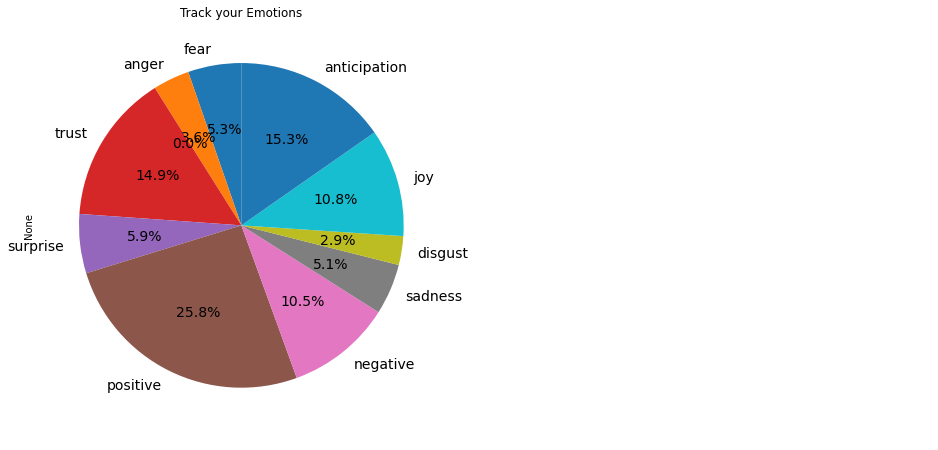

In [170]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df1.mean().plot(kind='pie', y = 'total_arrests', ax=ax1, autopct='%1.1f%%', startangle=90, shadow=False, legend = False, fontsize=14)
# plot table
plt.title('Track your Emotions')
ax2 = plt.subplot(122)
plt.axis('off')
plt.show()

In [171]:
today = max(df1.date)
today

Timestamp('2004-08-13 00:00:00')

In [172]:
last_seven_days = df1[df1["date"].isin(pd.date_range("2004-8-10", "2004-8-13"))]
last_month = df1[df1["date"].isin(pd.date_range("2004-7-10", "2004-8-13"))]

<ipython-input-173-a3e7fd026d6f>:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  last_seven_days.mean().plot(kind='pie', y = 'total_arrests', ax=ax1, autopct='%1.1f%%', startangle=90, shadow=False, legend = False, fontsize=14)


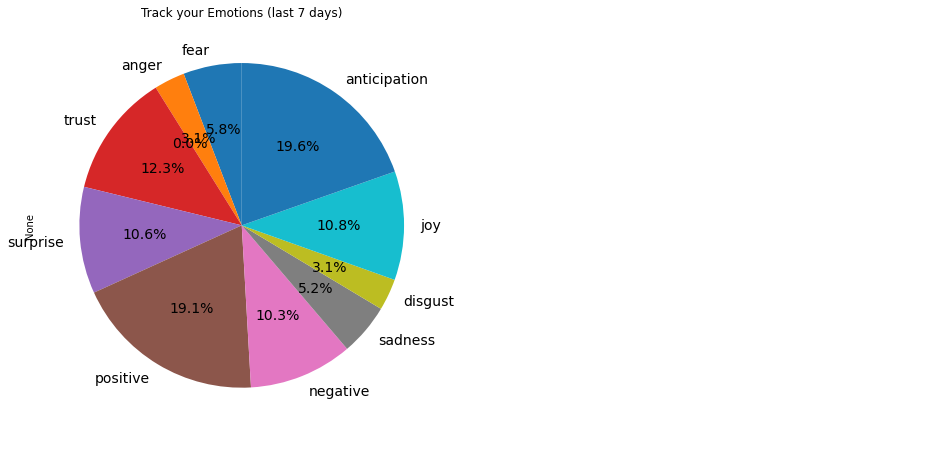

In [173]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
last_seven_days.mean().plot(kind='pie', y = 'total_arrests', ax=ax1, autopct='%1.1f%%', startangle=90, shadow=False, legend = False, fontsize=14)
# plot table
plt.title('Track your Emotions (last 7 days)')
ax2 = plt.subplot(122)
plt.axis('off')
plt.show()

<ipython-input-174-f78dff9ea502>:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  last_month.mean().plot(kind='pie', y = 'total_arrests', ax=ax1, autopct='%1.1f%%', startangle=90, shadow=False, legend = False, fontsize=14)


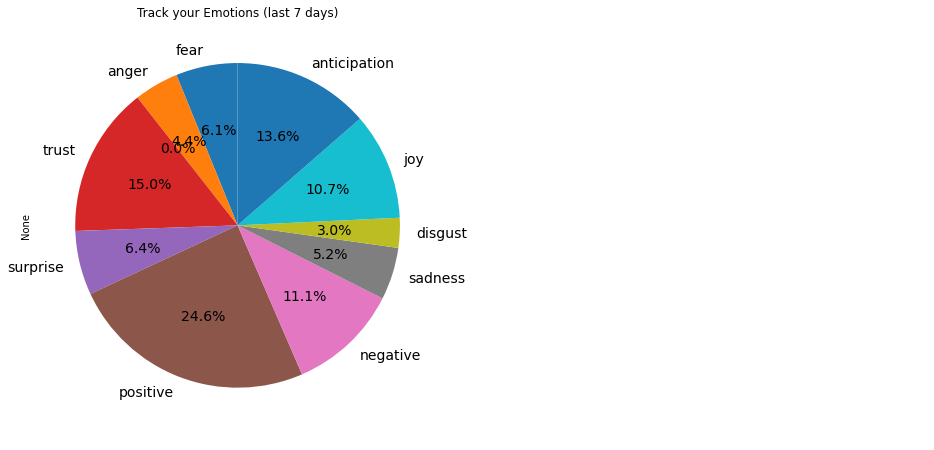

In [174]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
last_month.mean().plot(kind='pie', y = 'total_arrests', ax=ax1, autopct='%1.1f%%', startangle=90, shadow=False, legend = False, fontsize=14)
# plot table
plt.title('Track your Emotions (last 7 days)')
ax2 = plt.subplot(122)
plt.axis('off')
plt.show()

In [175]:
#import datetime
#datetime.datetime.now() - datetime.timedelta(days=7)

In [176]:
df

,date,text,Emotion
4,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
5,"10,June,2004",I had an interesting conversation...,"{'fear': 0.08181818181818182, 'anger': 0.07272..."
6,"10,June,2004",Somehow Coca-Cola has a way of su...,"{'fear': 0.038461538461538464, 'anger': 0.0769..."
7,"10,June,2004","If anything, Korea is a country o...","{'fear': 0.10144927536231885, 'anger': 0.07246..."
8,"10,June,2004",Take a read of this news article ...,"{'fear': 0.125, 'anger': 0.05357142857142857, ..."
...,...,...,...
69,"10,August,2004",Korea's pretty funny sometimes. ...,"{'fear': 0.11382113821138211, 'anger': 0.04065..."
70,"09,August,2004","Ya, I'm off to Canada/Vancouver a...","{'fear': 0.016260162601626018, 'anger': 0.0081..."
71,"09,August,2004","Ah, finally...someone else I know...","{'fear': 0.014084507042253521, 'anger': 0.0140..."
72,"08,August,2004",I think if I'm going to claim 여의도...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."


In [177]:
df["topemotions"] = df.text.apply(calcu2)
df

,date,text,Emotion,topemotions
4,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...","[(trust, 0.5)]"
5,"10,June,2004",I had an interesting conversation...,"{'fear': 0.08181818181818182, 'anger': 0.07272...","[(positive, 0.24545454545454545)]"
6,"10,June,2004",Somehow Coca-Cola has a way of su...,"{'fear': 0.038461538461538464, 'anger': 0.0769...","[(trust, 0.19230769230769232)]"
7,"10,June,2004","If anything, Korea is a country o...","{'fear': 0.10144927536231885, 'anger': 0.07246...","[(positive, 0.15942028985507245)]"
8,"10,June,2004",Take a read of this news article ...,"{'fear': 0.125, 'anger': 0.05357142857142857, ...","[(positive, 0.21428571428571427)]"
...,...,...,...,...
69,"10,August,2004",Korea's pretty funny sometimes. ...,"{'fear': 0.11382113821138211, 'anger': 0.04065...","[(positive, 0.21951219512195122)]"
70,"09,August,2004","Ya, I'm off to Canada/Vancouver a...","{'fear': 0.016260162601626018, 'anger': 0.0081...","[(positive, 0.25203252032520324)]"
71,"09,August,2004","Ah, finally...someone else I know...","{'fear': 0.014084507042253521, 'anger': 0.0140...","[(positive, 0.30985915492957744)]"
72,"08,August,2004",I think if I'm going to claim 여의도...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...","[(anticipation, 0.43333333333333335)]"


In [178]:
df3 = pd.DataFrame(df['topemotions'].to_list(), columns=['team1','team2'])
df3

,team1,team2
0,"(trust, 0.5)",None
1,"(positive, 0.24545454545454545)",None
2,"(trust, 0.19230769230769232)",None
3,"(positive, 0.15942028985507245)",None
4,"(positive, 0.21428571428571427)",None
...,...,...
65,"(positive, 0.21951219512195122)",None
66,"(positive, 0.25203252032520324)",None
67,"(positive, 0.30985915492957744)",None
68,"(anticipation, 0.43333333333333335)",None


In [179]:
df4 = df3['team1'].apply(pd.Series).rename(columns={0: "Emoji", 1: "Value"})
result = pd.concat([df, df4], axis=1, join="inner")
result

,date,text,Emotion,topemotions,Emoji,Value
4,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...","[(trust, 0.5)]",positive,0.214286
5,"10,June,2004",I had an interesting conversation...,"{'fear': 0.08181818181818182, 'anger': 0.07272...","[(positive, 0.24545454545454545)]",trust,0.193548
6,"10,June,2004",Somehow Coca-Cola has a way of su...,"{'fear': 0.038461538461538464, 'anger': 0.0769...","[(trust, 0.19230769230769232)]",positive,0.290323
7,"10,June,2004","If anything, Korea is a country o...","{'fear': 0.10144927536231885, 'anger': 0.07246...","[(positive, 0.15942028985507245)]",positive,0.345455
8,"10,June,2004",Take a read of this news article ...,"{'fear': 0.125, 'anger': 0.05357142857142857, ...","[(positive, 0.21428571428571427)]",positive,0.229885
...,...,...,...,...,...,...
65,"02,August,2004",There are a few ways to beat the ...,"{'fear': 0.017391304347826087, 'anger': 0.0260...","[(positive, 0.30434782608695654)]",positive,0.219512
66,"13,August,2004","Ok, it's not at all scientific. I...","{'fear': 0.07407407407407407, 'anger': 0.03703...","[(positive, 0.2222222222222222)]",positive,0.252033
67,"12,August,2004",Just in time for Mel Gibson's ur...,"{'fear': 0.0449438202247191, 'anger': 0.044943...","[(positive, 0.1797752808988764)]",positive,0.309859
68,"12,August,2004","Man, with all that is going on I ...","{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...","[(anticipation, 0.42857142857142855)]",anticipation,0.433333


In [180]:
result.loc[result['Emoji'] == 'positive', 'emojisss'] = emoji.emojize("\U0001F603")
result.loc[result['Emoji'] == 'negative', 'emojisss'] = emoji.emojize("\U0001F611")
result.loc[result['Emoji'] == 'trust', 'emojisss'] = emoji.emojize("\U0001F917")
result.loc[result['Emoji'] == 'anticipation', 'emojisss'] = emoji.emojize("\U0001F929")
result.loc[result['Emoji'] == 'surprise', 'emojisss'] = emoji.emojize("\U0001F600")
result.loc[result['Emoji'] == 'anger', 'emojisss'] = emoji.emojize("\U0001F922")
result.loc[result['Emoji'] == 'sadness', 'emojisss'] = emoji.emojize("\U0001F636")
result.loc[result['Emoji'] == 'joy', 'emojisss'] = emoji.emojize("\U0001F636")
result.loc[result['Emoji'] == 'disgust', 'emojisss'] = emoji.emojize("\U0001F602")
result.loc[result['Emoji'] == 'fear', 'emojisss'] = emoji.emojize("\U0001F602")
result

,date,text,Emotion,topemotions,Emoji,Value,emojisss
4,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...","[(trust, 0.5)]",positive,0.214286,😃
5,"10,June,2004",I had an interesting conversation...,"{'fear': 0.08181818181818182, 'anger': 0.07272...","[(positive, 0.24545454545454545)]",trust,0.193548,🤗
6,"10,June,2004",Somehow Coca-Cola has a way of su...,"{'fear': 0.038461538461538464, 'anger': 0.0769...","[(trust, 0.19230769230769232)]",positive,0.290323,😃
7,"10,June,2004","If anything, Korea is a country o...","{'fear': 0.10144927536231885, 'anger': 0.07246...","[(positive, 0.15942028985507245)]",positive,0.345455,😃
8,"10,June,2004",Take a read of this news article ...,"{'fear': 0.125, 'anger': 0.05357142857142857, ...","[(positive, 0.21428571428571427)]",positive,0.229885,😃
...,...,...,...,...,...,...,...
65,"02,August,2004",There are a few ways to beat the ...,"{'fear': 0.017391304347826087, 'anger': 0.0260...","[(positive, 0.30434782608695654)]",positive,0.219512,😃
66,"13,August,2004","Ok, it's not at all scientific. I...","{'fear': 0.07407407407407407, 'anger': 0.03703...","[(positive, 0.2222222222222222)]",positive,0.252033,😃
67,"12,August,2004",Just in time for Mel Gibson's ur...,"{'fear': 0.0449438202247191, 'anger': 0.044943...","[(positive, 0.1797752808988764)]",positive,0.309859,😃
68,"12,August,2004","Man, with all that is going on I ...","{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...","[(anticipation, 0.42857142857142855)]",anticipation,0.433333,🤩


In [181]:
result['Emoji'] = result['Emoji'] + result['emojisss']
result

,date,text,Emotion,topemotions,Emoji,Value,emojisss
4,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...","[(trust, 0.5)]",positive😃,0.214286,😃
5,"10,June,2004",I had an interesting conversation...,"{'fear': 0.08181818181818182, 'anger': 0.07272...","[(positive, 0.24545454545454545)]",trust🤗,0.193548,🤗
6,"10,June,2004",Somehow Coca-Cola has a way of su...,"{'fear': 0.038461538461538464, 'anger': 0.0769...","[(trust, 0.19230769230769232)]",positive😃,0.290323,😃
7,"10,June,2004","If anything, Korea is a country o...","{'fear': 0.10144927536231885, 'anger': 0.07246...","[(positive, 0.15942028985507245)]",positive😃,0.345455,😃
8,"10,June,2004",Take a read of this news article ...,"{'fear': 0.125, 'anger': 0.05357142857142857, ...","[(positive, 0.21428571428571427)]",positive😃,0.229885,😃
...,...,...,...,...,...,...,...
65,"02,August,2004",There are a few ways to beat the ...,"{'fear': 0.017391304347826087, 'anger': 0.0260...","[(positive, 0.30434782608695654)]",positive😃,0.219512,😃
66,"13,August,2004","Ok, it's not at all scientific. I...","{'fear': 0.07407407407407407, 'anger': 0.03703...","[(positive, 0.2222222222222222)]",positive😃,0.252033,😃
67,"12,August,2004",Just in time for Mel Gibson's ur...,"{'fear': 0.0449438202247191, 'anger': 0.044943...","[(positive, 0.1797752808988764)]",positive😃,0.309859,😃
68,"12,August,2004","Man, with all that is going on I ...","{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...","[(anticipation, 0.42857142857142855)]",anticipation🤩,0.433333,🤩


Text(0, 0.5, 'value')

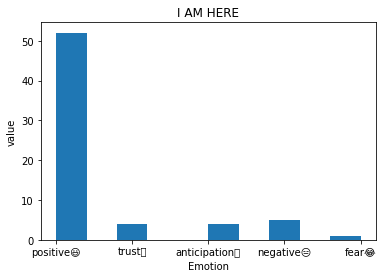

In [183]:
fig, ax = plt.subplots(1, 1)
ax.hist(result["Emoji"])
ax.set_title("I AM HERE")
ax.set_xlabel('Emotion')
ax.set_ylabel('value')
